# **One Neuron with Four Inputs**

In [1]:
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1]
bias = 2

In [2]:
output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + inputs[3]*weights[3] + bias
output

4.8

# **Three Neurons with Four Inputs**

In [3]:
inputs = [1,2,3,2.5]

# four inputs => four weights associated with them
weights1 = [0.2,0.8,-0.5,1.0]
weights2 = [0.5,-0.91,0.26,-0.5]
weights3 = [-0.26,-0.27,0.17,0.87]

# each neuron has its own bias
bias1 = 2
bias2 = 3
bias3 = 0.5

In [4]:
output = [
          inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
          inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
          inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3
         ]
output

[4.8, 1.21, 2.385]

# **Cleaning Code**

In [5]:
inputs = [1,2,3,2.5]

# four inputs => four weights associated with them
weights = [
           [0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]
          ]

# each neuron has its own bias
biases = [2,3,0.5]

In [6]:
layer_outputs = [] # we will get one output for each neuron, this is called a layer output

for neuron_weights, neuron_bias in zip(weights, biases):
  neuron_output = 0 # output of a given neuron
  for n_input, weight in zip(inputs,neuron_weights):
    neuron_output += n_input * weight
  neuron_output += neuron_bias
  layer_outputs.append(neuron_output)

layer_outputs

# optimizer tunes the weights and biases to minimize the cost function

[4.8, 1.21, 2.385]

# **Dot Product**

In [7]:
import numpy as np

In [8]:
# for one neuron
inputs = [1,2,3,2.5]
weights1 = [0.2,0.8,-0.5,1]
bias = 2

output = np.dot(weights, inputs) + bias # here order inside the dot product matters as same in matrix dot products
output

array([4.8  , 0.21 , 3.885])

In [9]:
# for a layer of neurons
inputs = [1,2,3,2.5]

weights = [
           [0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]
          ]

biases = [2,3,0.5]

In [10]:
output = np.dot(weights, inputs) + biases # (3x4).(4x1) = (3x1); biases is converted automatically to np array
output

array([4.8  , 1.21 , 2.385])

# **Batches, Layers and Objects**

In [11]:
# batches

In [12]:
# batches can be run in parallel
# also batches helps to generalize the model, i.e., rather than showing one batch at a time and fitting it, we give it multiple batches so that it can generalize faster
# if batch size is not chosen correctly, the model will over-generalize, this is called over-fitting

inputs = [
          [1,2,3,2.5],
          [2,5,-1,2],
          [-1.5,2.7,3.3,-0.8]
         ]

weights = [
           [0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]
          ]
          
biases = [2,3,0.5]

In [13]:
output = np.dot(inputs, np.array(weights).T) + biases # (3x4).(4x3) = (3x3); biases is converted automatically to np array
output

array([[ 4.8  ,  1.21 ,  2.385],
       [ 8.9  , -1.81 ,  0.2  ],
       [ 1.41 ,  1.051,  0.026]])

In [14]:
# layers

In [15]:
# batches can be run in parallel
# also batches helps to generalize the model, i.e., rather than showing one batch at a time and fitting it, we give it multiple batches so that it can generalize faster
# if batch size is not chosen correctly, the model will over-generalize, this is called over-fitting

inputs = [
          [1,2,3,2.5],
          [2,5,-1,2],
          [-1.5,2.7,3.3,-0.8]
         ]

weights = [
           [0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]
          ]
          
biases = [2,3,0.5]

weights2 = [
            [0.1,-0.14,0.5],
            [-0.5,0.12,-0.33],
            [-0.44,0.73,-0.13]
          ]

biases2 = [-1,2,-0.5]

In [16]:
layer1_outputs = np.dot(inputs, np.array(weights).T) + biases
layer2_outputs = np.dot(layer1_outputs, np.array(weights2).T) + biases2 # output from layer1 becomes input for layer2
layer2_outputs

array([[ 0.5031 , -1.04185, -2.03875],
       [ 0.2434 , -2.7332 , -5.7633 ],
       [-0.99314,  1.41254, -0.35655]])

In [17]:
# objects
X = [
      [1,2,3,2.5],
      [2,5,-1,2],
      [-1.5,2.7,3.3,-0.8]
    ] #  X is standard for input feature sets

np.random.seed(0)

In [18]:
class Layer_Dense:  # dense means that every neuron is connected to every perceptron
  def __init__(self, n_inputs, n_neurons):
    # set random weights initally, we are making the weights as n_inputs x n_neurons so that we don't have to do a transpose for every forward-pass
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) # returns a gaussian distribution bounded around 0
  
    # setting biases to initially zero, if the network becomes dead this may be the problem
    self.biases = np.zeros((1,n_neurons))
  def forward(self, inputs):
    # either it is the first hidden layer or the output from the previous layer
    self.output = np.dot(inputs, self.weights) + self.biases

In [19]:
# layers
layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5, 2)

In [20]:
layer1.forward(X)
layer1.output

array([[ 0.10758131,  1.03983522,  0.24462411,  0.31821498,  0.18851053],
       [-0.08349796,  0.70846411,  0.00293357,  0.44701525,  0.36360538],
       [-0.50763245,  0.55688422,  0.07987797, -0.34889573,  0.04553042]])

In [21]:
layer2.forward(layer1.output)
layer2.output

array([[ 0.148296  , -0.08397602],
       [ 0.14100315, -0.01340469],
       [ 0.20124979, -0.07290616]])

# **Activation Functions**

In [22]:
# activation functions are used so for its ability to add non-linearity into a neural network
# activation functions are used after we get the result from weights and biases
# generally output layers have different activation function than the hidden layers for obvious reasons

## **Heaviside Step Function**
$\mathcal{H(x)} = 
  \begin{cases} 
    0 & \text{if $x<=0$} \\ 
    1 & \text{if $x>0$} 
  \end{cases}
$


## **Sigmoid or Logistic Activation Function**

${\phi(x)} = \frac{1}{1+e^{-x}}$

This is a better activation function than Heaviside step function as we get a more granular output which helps in calculating loss more precisely and use an optimizer accordingly.

The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

This activation function also has the vanishing gradient problem. Each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training.

# **Rectified Linear Unit Funtion (ReLU)**

${\sigma(x)} = 
  \begin{cases} 
    0 & \text{if $x<=0$} \\ 
    x & \text{if $x>0$} 
  \end{cases}
$

or,

${\sigma(x)} = {\max(0, x)}$

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

## **Leaky ReLU**

It is an attempt to solve the dying ReLU problem which happens when ReLU always have values under 0 - this completely blocks learning in the ReLU because of gradients of 0 in the negative part.

${\sigma(x)} = 
  \begin{cases} 
    {\alpha}x & \text{if $x<=0$} \\ 
    x & \text{if $x>0$} 
  \end{cases}
$

or,

${\sigma(x)} = {\max({\alpha}x, x)}$

The leak helps to increase the range of the ReLU function. Usually, the value of **${\alpha}$** is 0.01 or so.

## **ReLU6**

It is basically ReLU restricted on the positive side.

${\sigma(x)} = 
  \begin{cases} 
    0 & \text {if $x<=0$} \\ 
    x & \text {if $0 < x < 6$} \\
    6 & \text {if $x >= 6$}
  \end{cases}
$

or,

${\sigma(x)} = {min(max(\alpha x, x), 6)}$

This helps to stop blowing up the activation thereby stopping the gradients to explode(going to inf) as well another of the small issues that occur with normal ReLUs.

We can also combine Relu6 and Leaky ReLU to make a better activation function

In [23]:
class Activation_ReLU:
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)

In [24]:
def create_data(points, classes):
  X = np.zeros((points*classes,2)) # data matrix (each row = single example)
  y = np.zeros(points*classes, dtype='uint8') # class labels
  
  for class_number in range(classes):
    ix = range(points*class_number,points*(class_number+1))
    r = np.linspace(0.0,1,points) # radius
    t = np.linspace(class_number*4,(class_number+1)*4,points) + np.random.randn(points)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  
  return X,y

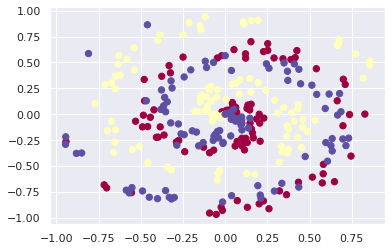

In [25]:
# lets visualize the data:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

X,y = create_data(100, 3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)  # it becomes difficult to classify if there were no color
plt.show()

In [26]:
# layers
layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

layer1.forward(X)

activation1.forward(layer1.output)
activation1.output

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00080274, 0.        , 0.00065987, 0.        , 0.00083796],
       [0.00082768, 0.        , 0.0005103 , 0.        , 0.00454176],
       ...,
       [0.01800099, 0.        , 0.00336391, 0.        , 0.26602511],
       [0.        , 0.16360456, 0.        , 0.13192221, 0.20328078],
       [0.        , 0.        , 0.        , 0.05579987, 0.31271706]])

## **Softmax Activation Function**
It is usually used in the output layer.

${\sigma(z)_{i}} = \frac{e^{z_{i}}}{\sum_{j=1}^K{e^{z_{j}}}} \text{ for i = 1, } \ldots \text{, K and z = (} z_{1}, \ldots , z_{K} \text{)} \in \mathbb{R}^{K}$

It fixes the issues of bounding and exclusivity of each neuron due to its own activation function.

Softmax is just the normalized form of the function ${y}=e^{x}$ to get rid of negative values while keeping their essence.


In [27]:
class Activation_Softmax:
  def forward(self, inputs):
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True)) # we are subtracting max so that the value doesn't overflow
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

In [28]:
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

In [29]:
dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

In [30]:
dense1.forward(X)
activation1.forward(dense1.output)

In [31]:
dense2.forward(activation1.output)
activation2.forward(dense2.output)

In [32]:
activation2.output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33336345, 0.33331786, 0.33331869],
       [0.33333333, 0.33333333, 0.33333333]])

# **Loss Functions**

## **Categorical Cross-Entropy**

In general the loss function of choice for classification using softmax as an activation function is Categorical Cross-Entropy

**${L_{i}} = -{\sum_{j}{y_{i, j} log(\hat{y_{i,j}})} }$**

where, 

${L_{i}}$ = sample loss value

${i}$ = ith sample in set

${j}$ = label / output index

${y}$ = target values

${\hat{y}}$ = predicted values

One-Hot Encoding can be used to simplify this formula further to :

**${L_{i}} = -log(\hat{y_{i,k}})$**

where,

${k}$ = target label index, index of correct class probability

### **One-Hot Encoding**

This can be easily understood with examples:

1.

  Classes: 2

  Label: 0
  
  One-Hot: [1, 0]

2.

  Classes: 5

  Label: 3
  
  One-Hot: [0, 0, 0, 1, 0]

In [33]:
"""
# in plain python
softmax_outputs = [[0.7,0.1,0.2],
                   [0.1,0.5,0.4],
                   [0.02, 0.09, 0.08]
                  ]
class_targets = [0,1,1]
for targ_idx, distribution in zip(class_targets, softmax_outputs):
  print(distribution[targ_idx])
"""

"""
# using numpy
softmax_outputs = np.array([[0.7,0.1,0.2],
                   [0.1,0.5,0.4],
                   [0.02, 0.09, 0.08]
                  ])
class_targets = [0,1,1]
print(softmax_outputs[[0,1,2], class_targets])  # as softmax_outputs is a numpy array, we can index this numpy array in a variety of ways, so we pass in a list of indicies 

# so the categorical cross-entropy loss will be
neg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]) so we get the loss
# the above has one problem, that the -np.log(0) is infinite so, the mean becomes inf
# one of the ways to solve this is to clip the range

# loss of the batch becomes the mean of the losses
average_loss = np.mean(neg_log)
"""

'\n# using numpy\nsoftmax_outputs = np.array([[0.7,0.1,0.2],\n                   [0.1,0.5,0.4],\n                   [0.02, 0.09, 0.08]\n                  ])\nclass_targets = [0,1,1]\nprint(softmax_outputs[[0,1,2], class_targets])  # as softmax_outputs is a numpy array, we can index this numpy array in a variety of ways, so we pass in a list of indicies \n\n# so the categorical cross-entropy loss will be\nneg_loss = -np.log(softmax_outputs[range(len(softmax_outputs)), class_targets]) so we get the loss\n# the above has one problem, that the -np.log(0) is infinite so, the mean becomes inf\n# one of the ways to solve this is to clip the range\n\n# loss of the batch becomes the mean of the losses\naverage_loss = np.mean(neg_log)\n'

In [34]:
class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

class Loss_CategoricalCrossentropy(Loss):
  def forward(self, y_pred, y_true):
    samples = len(y_pred)
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    # checking if the y_true is either one-hot encoding values or are scalar values
    if len(y_true.shape)==1:
      correct_confidences = y_pred_clipped[range(samples), y_true]
    elif len(y_true,shape)==2:
      correct_confidences = np.sum(y_pred_clipped*y_true,axis=1)
    
    loss = -np.log(correct_confidences)
    return loss

In [35]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(activation2.output, y)

loss

1.0988154949726716